**Overview**

*   **Tool calling** enables AI models to interact directly with systems like databases or APIs, going beyond just natural language responses.
*   This is crucial when systems require specific input schemas (e.g., API payloads).
*   **Tool calling** and **function calling** are interchangeable terms.

**Key Concepts**

*   **Tool Creation**: Tools are created by associating a function with a schema using the `@tool` decorator.
*   **Tool Binding**: Tools must be connected to a model that supports tool calling. This allows the model to understand the tool and its input schema.
*   **Tool Calling**: The model decides when to use a tool and generates a response that matches the tool's input schema.
*   **Tool Execution**: The tool is executed with the arguments provided by the model.

**Recommended Workflow**

*   Tools are created and then passed as a list to the `.bind_tools()` method of a model.
*   The model can be called as usual, and if a tool is called, the response will include the tool call arguments.
*   The tool call arguments can then be passed directly to the tool for execution.
*   Here is a pseudo-code example of the process:
    ```
    # Tool creation
    tools = [my_tool]
    # Tool binding
    model_with_tools = model.bind_tools(tools)
    # Tool calling
    response = model_with_tools.invoke(user_input)
    ```

**Tool Creation**

*   The `@tool` decorator is the recommended way to create a tool.
*   Here is an example of a tool that multiplies two integers, which was created using the `@tool` decorator:
    ```python
    from langchain_core.tools import tool
    @tool
    def multiply(a: int, b: int) -> int:
    """Multiply a and b."""
    return a * b
    ```

**Tool Binding**

*   Many model providers support tool calling.
*   The `.bind_tools()` method is used to specify which tools a model can use.
*   Here is an example that binds the previously defined multiply tool to a model:
    ```python
    llm_with_tools = tool_calling_model.bind_tools([multiply])
    ```

**Tool Calling**

*   The model decides when to call a tool based on the input's relevance.
*   If the input is not related to a tool, the model will respond in natural language.
*   If the input is relevant, the model will call the tool, and the response will contain a `tool_calls` attribute.
*  The `tool_calls` attribute contains the tool's name, arguments, ID and type.
*   Example: if the input is "What is 2 multiplied by 3?", the `tool_calls` attribute would be `{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'xxx', 'type': 'tool_call'}`

**Tool Execution**

*   Tools implement the `Runnable` interface, which means they can be invoked directly using `tool.invoke(args)`.
*   LangGraph also offers pre-built components like `ToolNode` that can execute tools on behalf of the user.

**Best Practices**

*   Models with explicit tool-calling APIs work better than non-fine-tuned models.
*   Tools should have clear names and descriptions to improve the model's performance.
*   Simple, narrowly focused tools are easier for models to use.
*   Providing a large list of tools to the model can be challenging for the model.

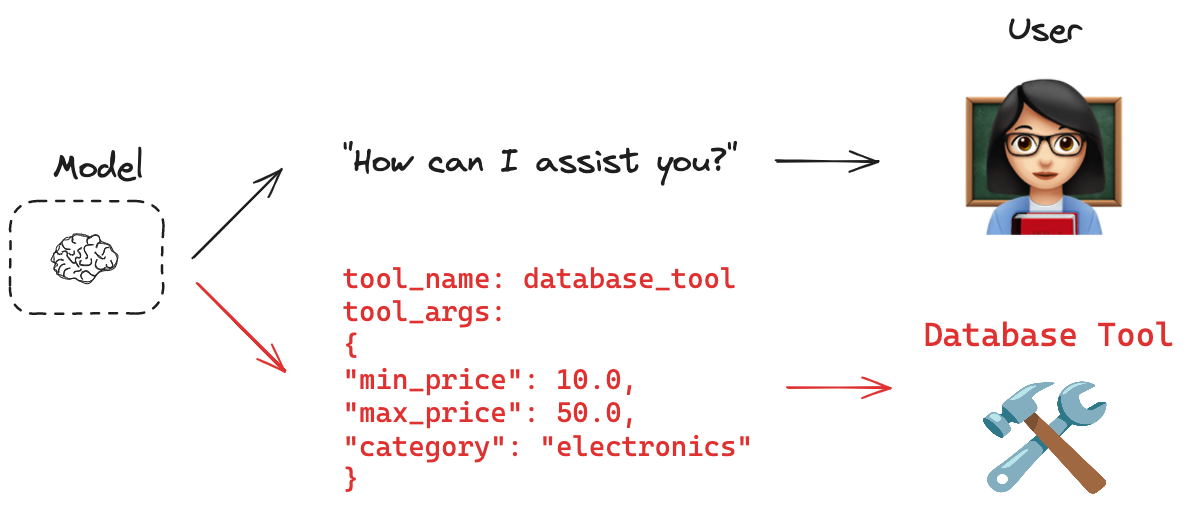
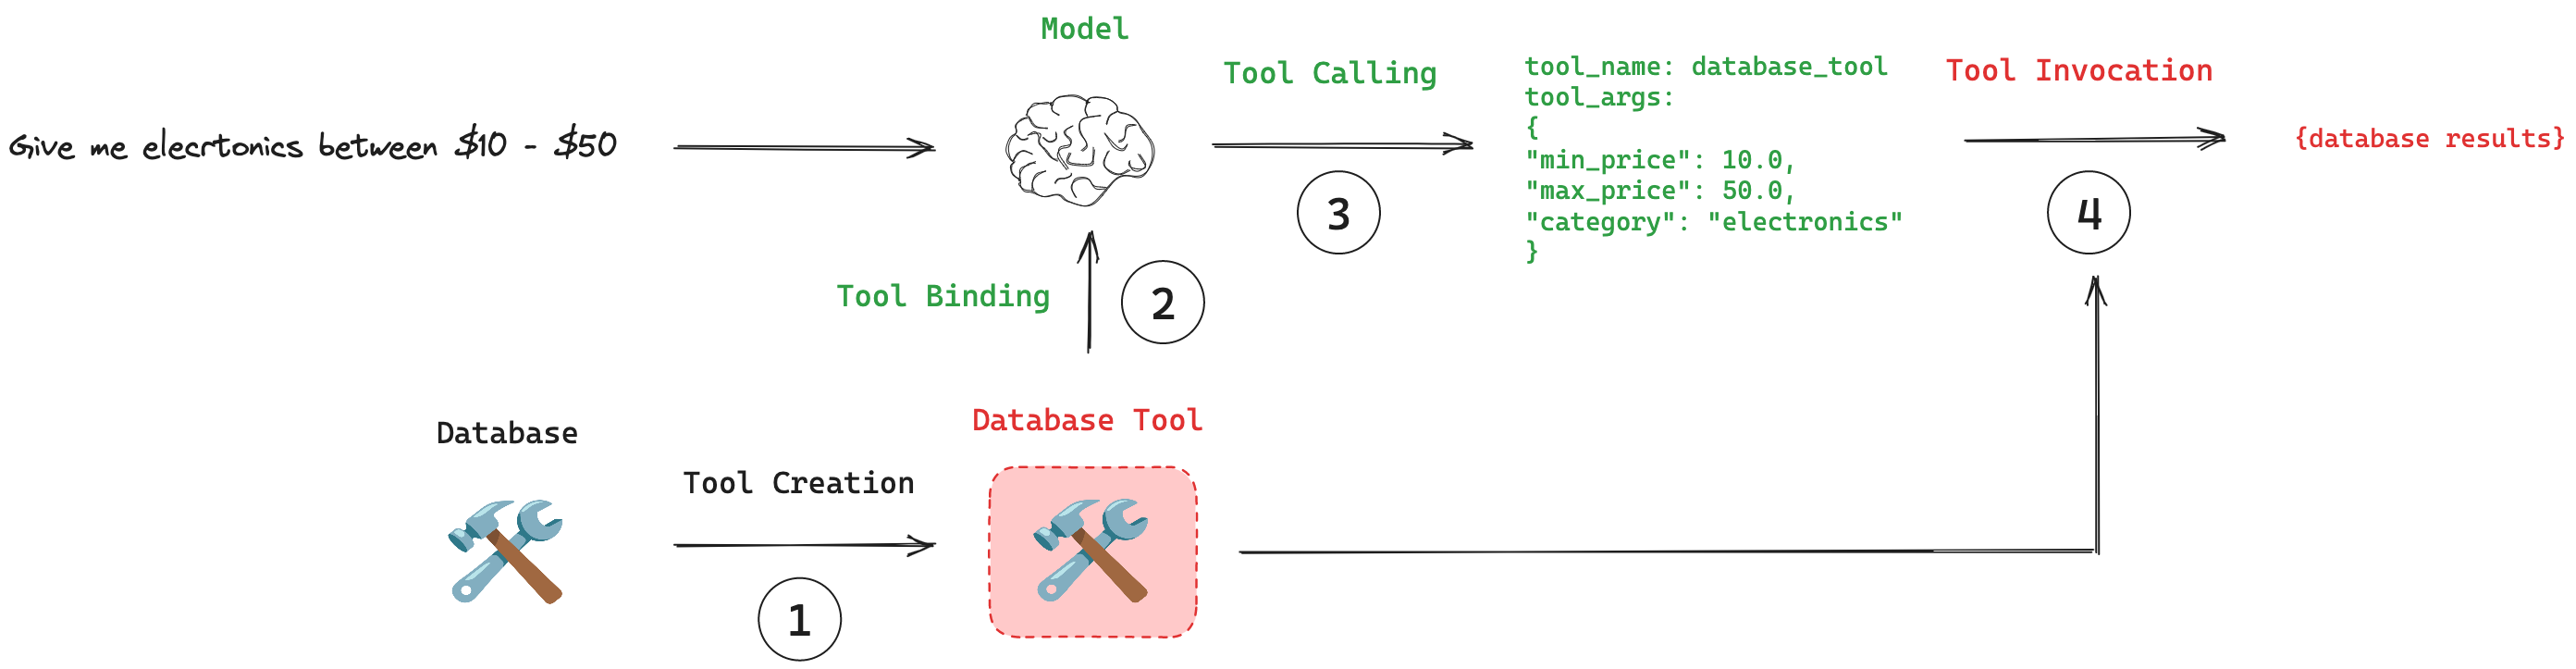
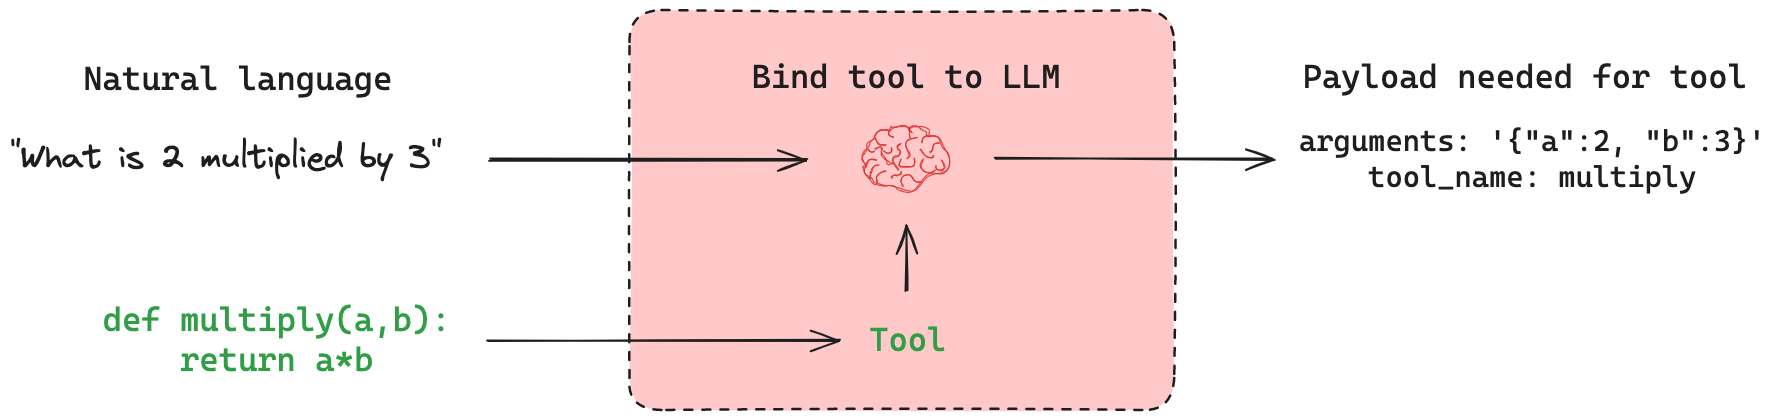